### 군집화(Clustering)
- 이상치에 민감함.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
rfm = pd.read_csv('rfm.csv', index_col="CustomerID")
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [6]:
rfm_cluster = rfm.iloc[:, :3]
rfm_cluster.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [7]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


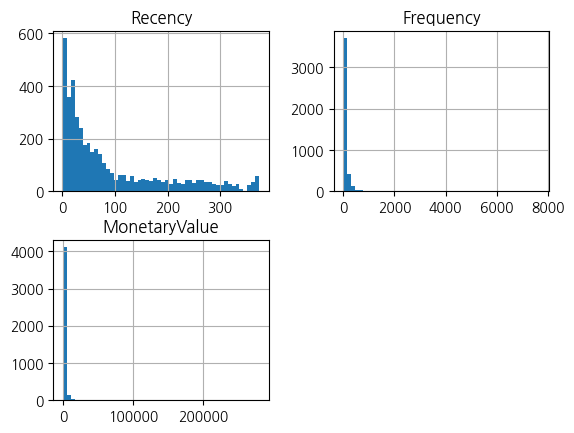

In [10]:
rfm_cluster.hist(bins=50);

### 로그 변환
- 값이 커질수록 완만하게 처리 가능

In [13]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.995732,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324


In [14]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.831803,3.728972,6.586102
std,1.339608,1.245411,1.258222
min,0.693147,0.693147,1.360977
25%,2.944439,2.890372,5.728321
50%,3.951244,3.737670,6.506524
75%,4.968071,4.595120,7.414652
max,5.926926,8.945984,12.543284


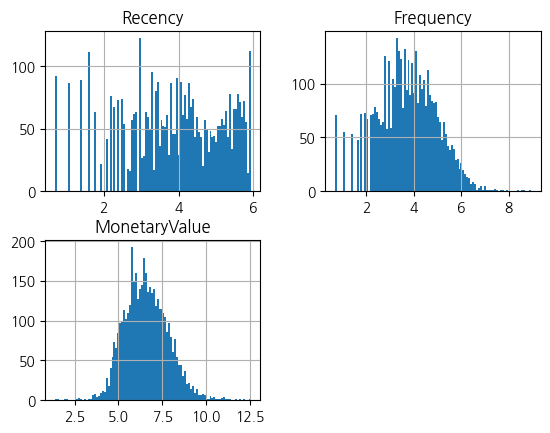

In [18]:
rfm_cluster_log.hist(bins=100);

### 스케일링

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)

In [27]:
pd.DataFrame(X).describe()

,0,1,2
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,2.293130e-17,-1.384068e-16,-6.617318e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.343237e+00,-2.437889e+00,-4.153264e+00
25%,-6.624825e-01,-6.734295e-01,-6.818194e-01
50%,8.917095e-02,6.984713e-03,-6.325377e-02
75%,8.483070e-01,6.955517e-01,6.585851e-01
max,1.564162e+00,4.189471e+00,4.735149e+00


In [32]:
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=rfm_cluster_log.columns)
X

,Recency,Frequency,MonetaryValue
0,1.461907,-2.437889,3.710308
1,-2.040527,1.188913,1.417102
2,0.372488,-0.211389,0.722104
3,-0.624188,0.461823,0.704363
4,1.424454,-0.673430,-0.612664
...,...,...,...
4333,1.343390,-1.068908,-1.100326
4334,1.024450,-1.324639,-1.734059
4335,-1.220333,-0.934757,-1.111567
4336,-1.659158,2.291117,0.824909


In [34]:
X.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4338.00,4338.00,4338.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.34,-2.44,-4.15
25%,-0.66,-0.67,-0.68
50%,0.09,0.01,-0.06
75%,0.85,0.70,0.66
max,1.56,4.19,4.74


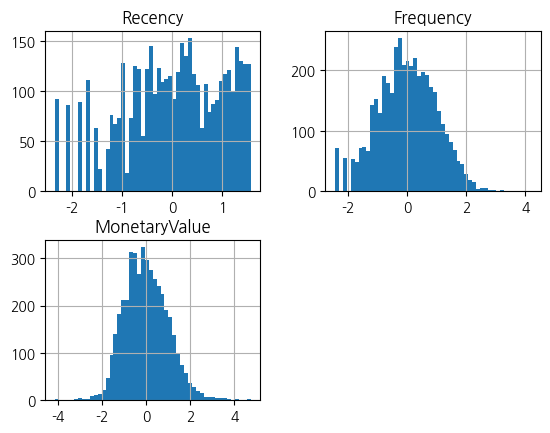

In [37]:
X.hist(bins=50);

### KMeans

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=8, n_init='auto', random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_, kmeans.inertia_

# 거리의 합 inertia

(array([[-1.51232589,  0.4657323 ,  0.41171799],
        [ 1.02670267, -0.53272383, -0.57140765],
        [-1.4847663 ,  1.65783579,  1.82164772],
        [-0.26489964,  1.01137713,  0.96685406],
        [-0.44072538, -0.98320675, -0.914978  ],
        [ 0.69909836,  0.25178387,  0.38261772],
        [-0.25464945,  0.08224924, -0.14764738],
        [ 1.06648438, -1.56986741, -1.37509482]]),
 2727.8656766739796)

In [44]:
kmeans.cluster_centers_.shape

(8, 3)

### 어떤 군집에서 sum of square 값이 제일 작을 지 확인

In [54]:
inertia = []
silhouettes = []
range_n_clusters = range(2, 21)

for n_cluster in range(2,21):
    kmeans = KMeans(n_clusters=n_cluster, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=',')

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

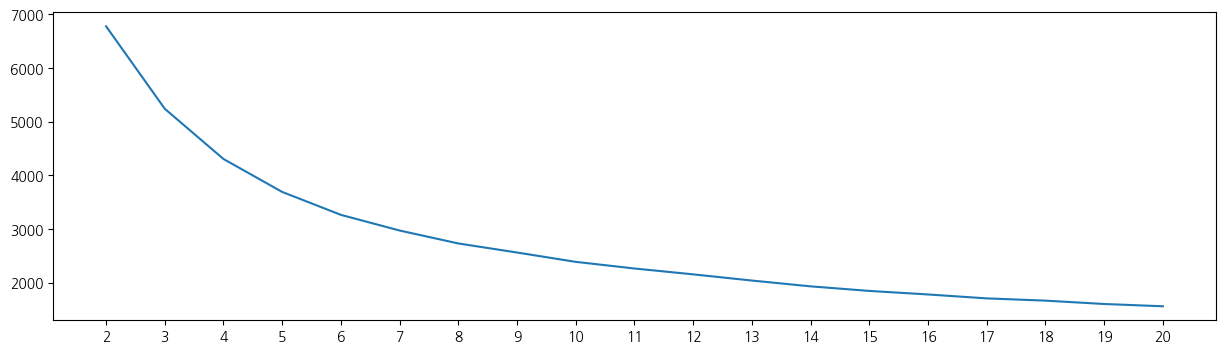

In [57]:
# inertia : 작을수록 좋음, 군집이 늘어날수록 작아짐.

plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.xticks(range_n_clusters)
plt.show()

### 실루엣 스코어 (1에 가까울수록 좋긴 함)
- a : 같은 클러스터 내의 다른 데이터 포인트들과의 평균 거리 (동일 군집 내에서의 응집도)
- b : 가장 가까운 클러스터에서의 평균 거리(즉 가장 가까운 군집과의 분리도)
- ss = (b-a)/max(a,b)

-* 전체 실루엣 계수의 평균값과 개별 군집의 평균값의 편차가 크지 않아야함

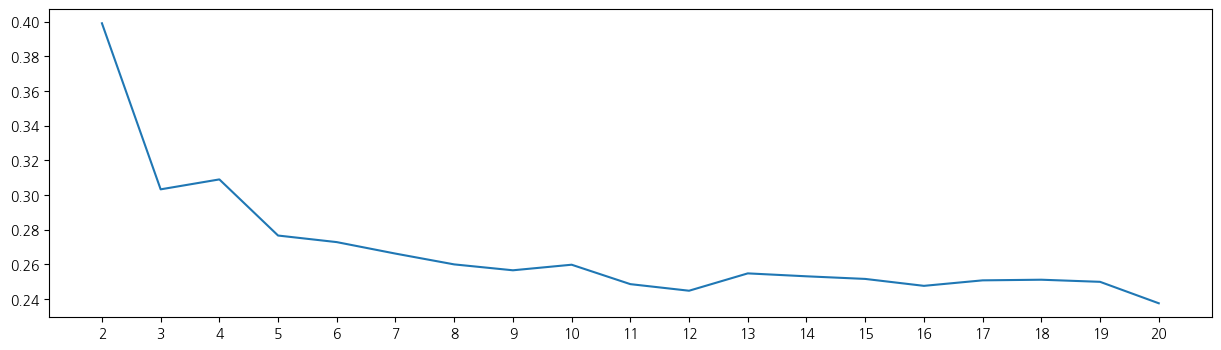

In [59]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.show()

### KElbowVisualizer

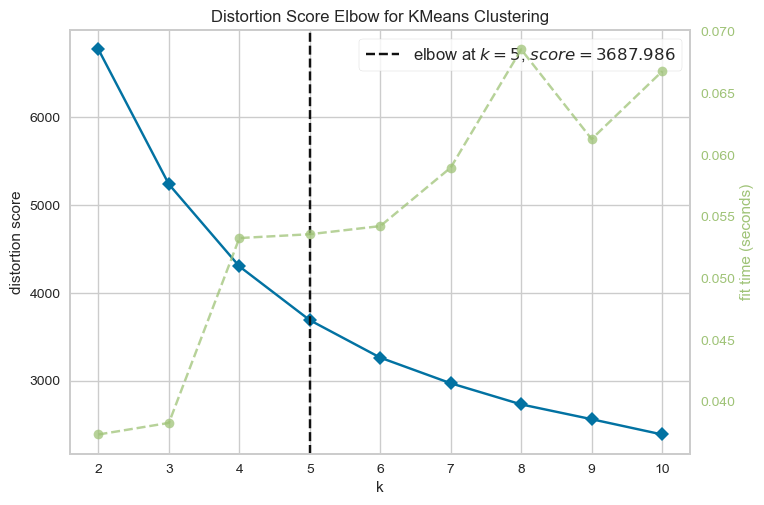

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=10, n_init_='auto')
KEV.fit(X)
KEV.show()

In [65]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [66]:
kmeans.labels_

array([0, 2, 0, ..., 0, 2, 0])

In [67]:
kmeans.cluster_centers_

array([[-0.04434947,  0.14435246,  0.08074503],
       [ 0.79654483, -0.97733495, -0.91830586],
       [-1.09752177,  1.18220079,  1.21114612]])

In [69]:
pd.Series(kmeans.labels_).value_counts()

0    1840
1    1497
2    1001
Name: count, dtype: int64

### 실루엣 분석 시각화

In [70]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.3033153127872086

In [73]:
rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver,0
12347.0,2,182,4310.00,5,5,5,555,15,platinum,2
12348.0,75,31,1797.24,2,3,4,234,9,gold,0
12349.0,19,73,1757.55,4,4,4,444,12,platinum,0
12350.0,310,17,334.40,1,2,2,122,5,silver,1
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver,1
18281.0,181,7,80.82,1,1,1,111,3,silver,1
18282.0,8,12,178.05,5,1,1,511,7,silver,0


In [74]:
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])

Cluster,0,1,2
RFM_class,,,
gold,1375,15,19
platinum,279,0,982
silver,186,1482,0


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

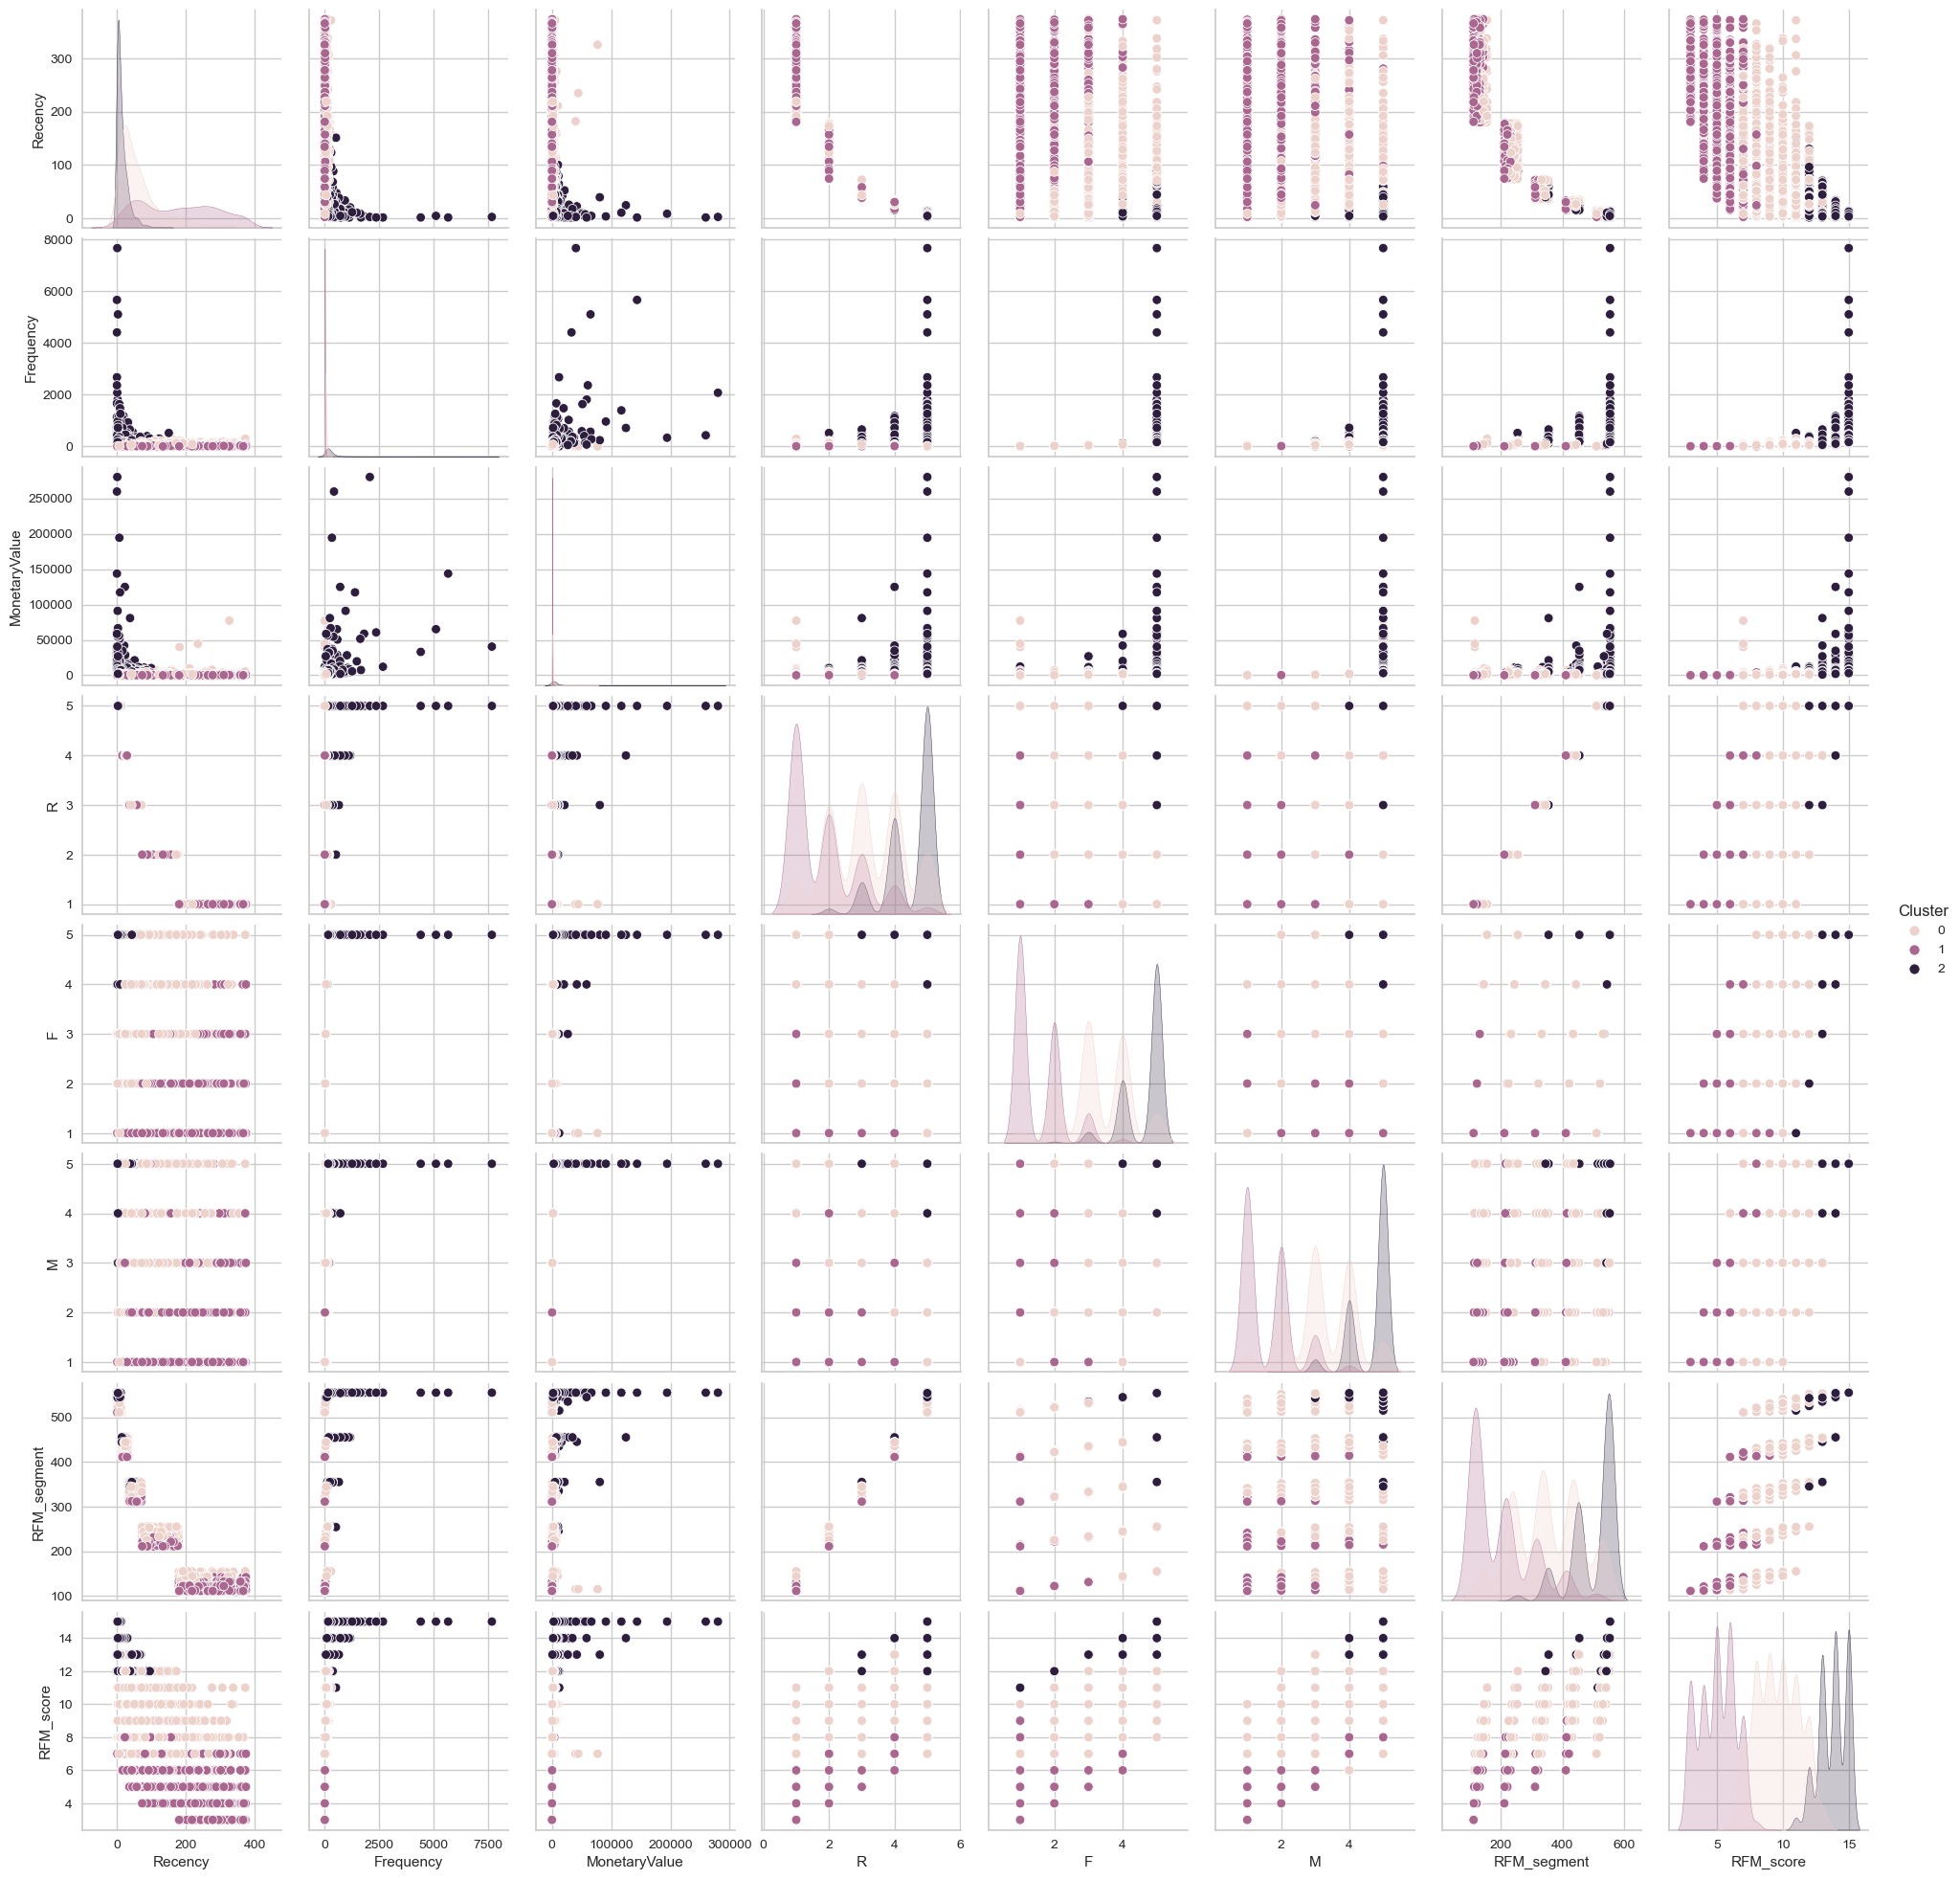

In [75]:
sns.pairplot(data=rfm, hue='Cluster')

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

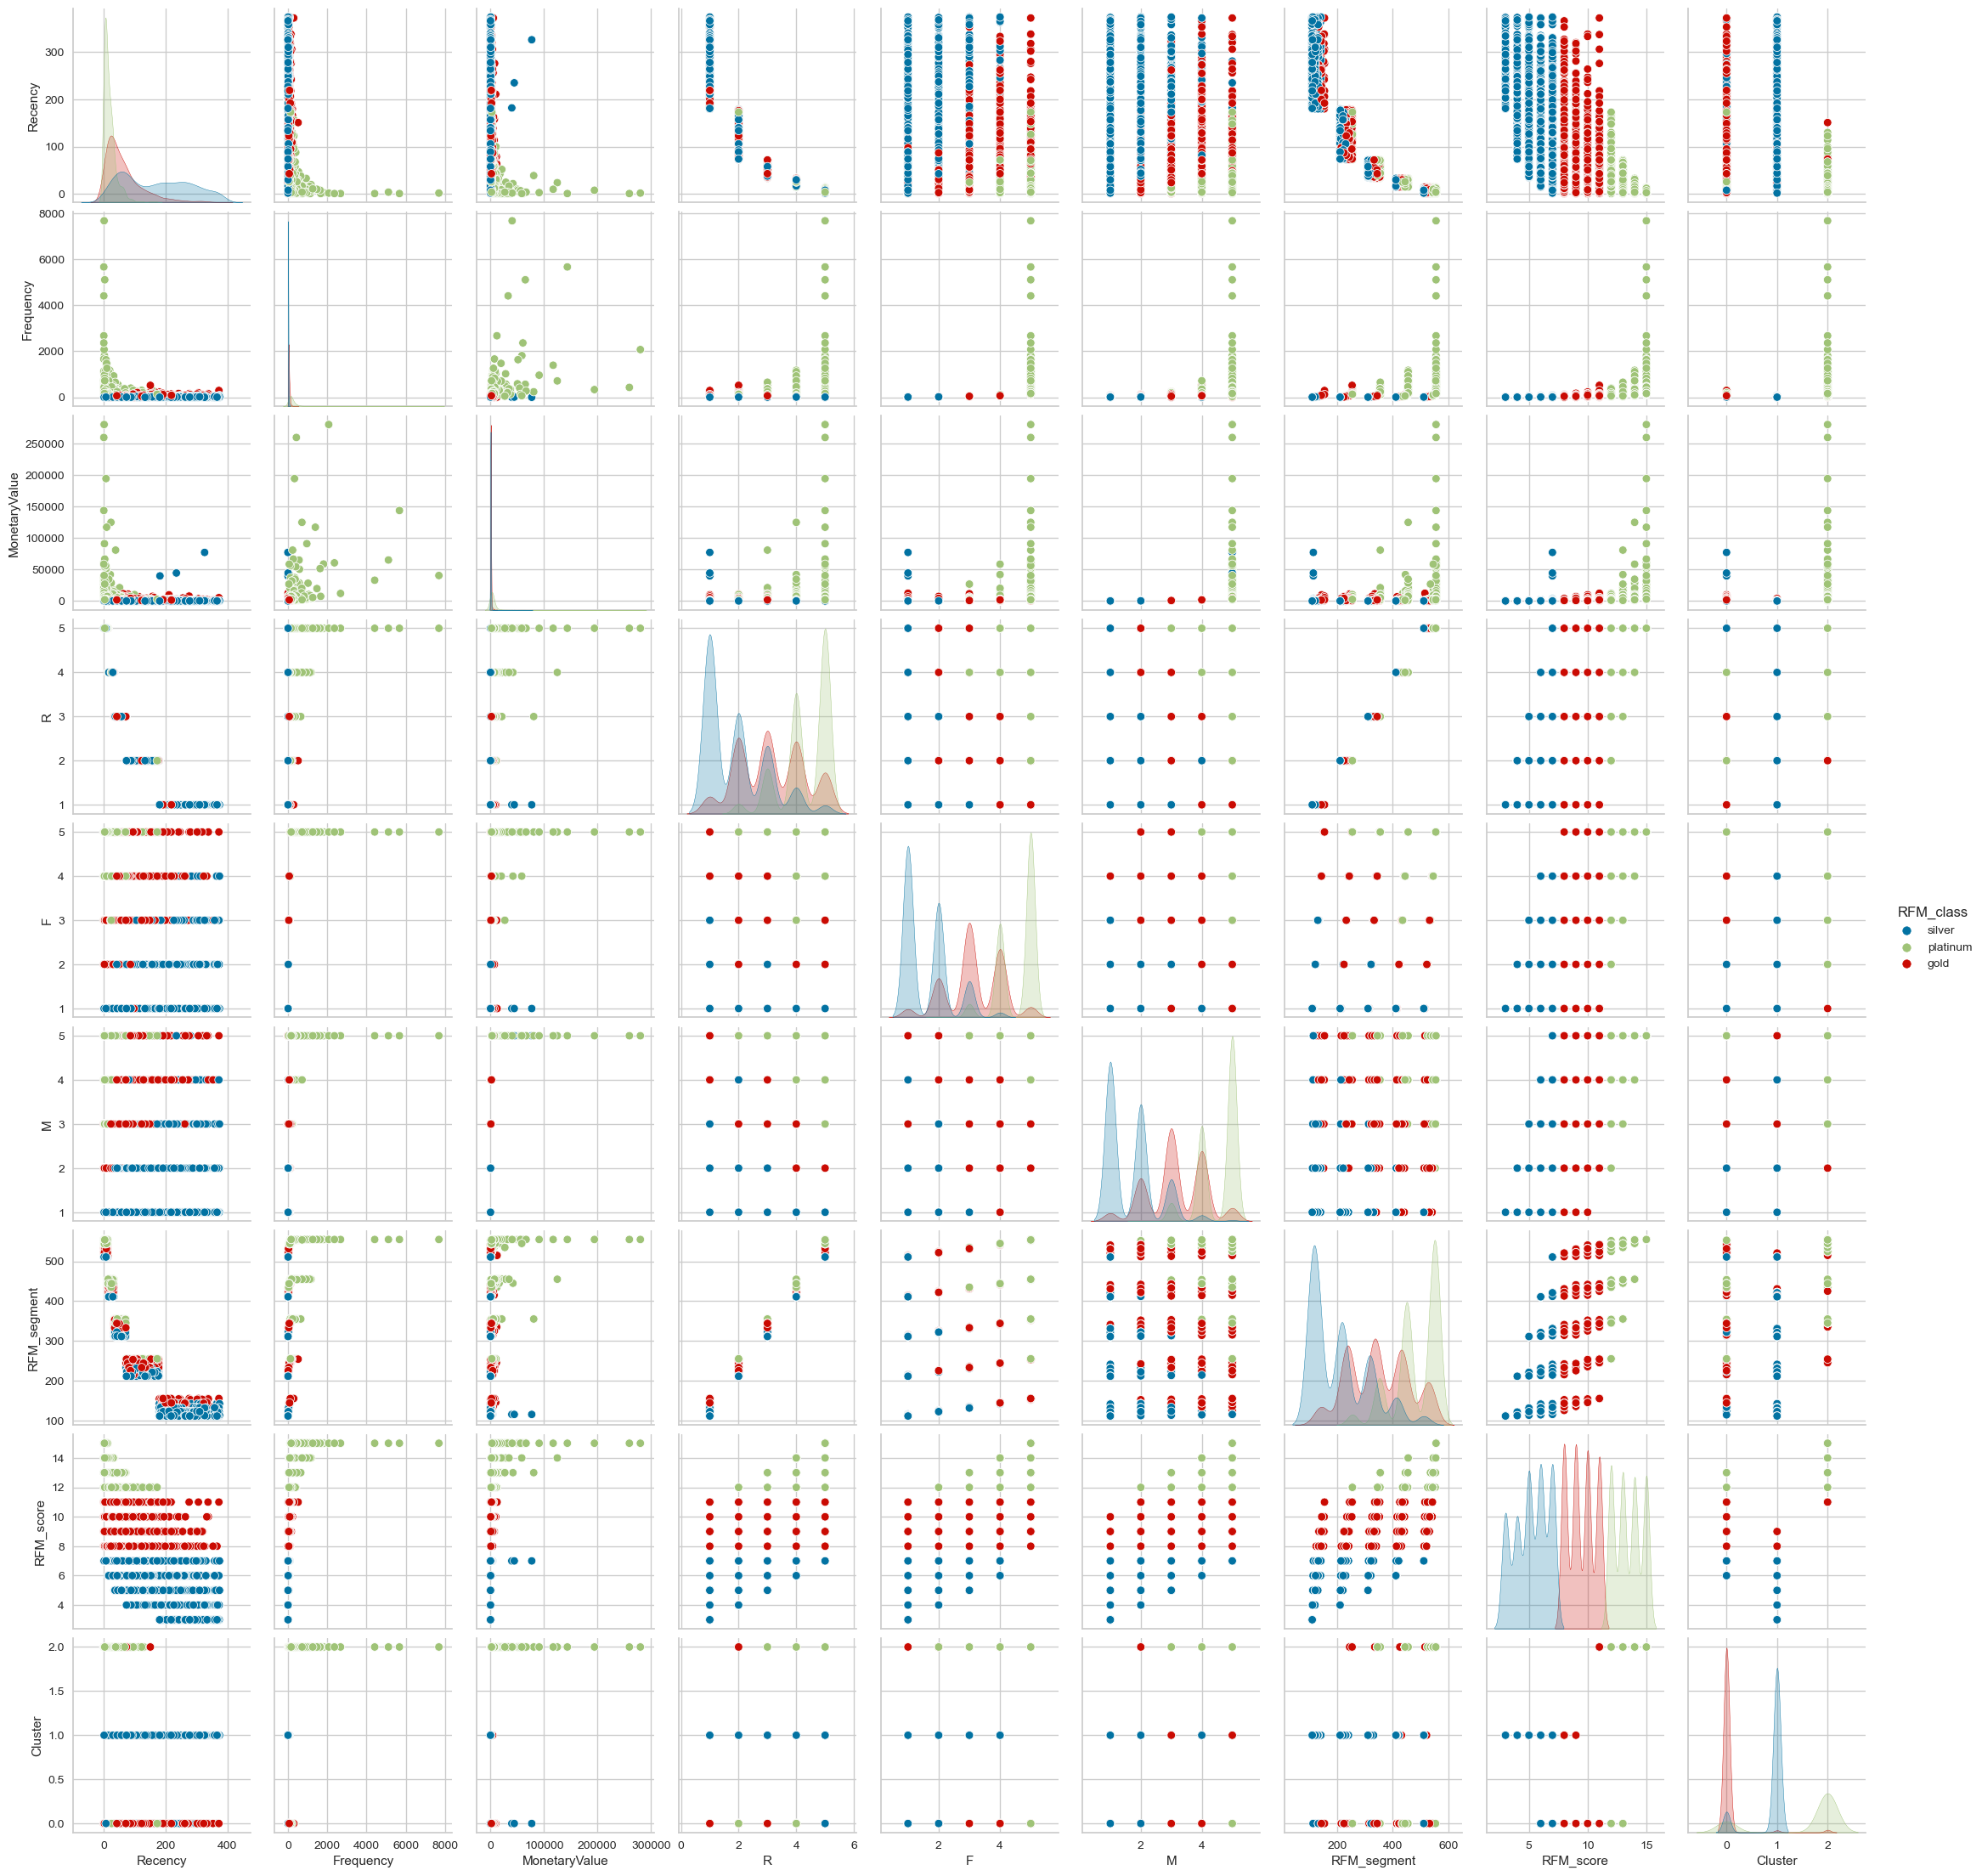

In [77]:
sns.pairplot(data=rfm, hue='RFM_class')